In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/My Drive/dataset/skin_cancer_dataset'
# print(os.listdir(dataset_path))

image_classes=os.listdir(dataset_path)
print(image_classes)

['benign', 'malignant']


In [4]:
benign_dir = '/content/drive/My Drive/dataset/skin_cancer_dataset/benign'
malignant_dir = '/content/drive/My Drive/dataset/skin_cancer_dataset/malignant'

benign_images = [os.path.join(benign_dir, fname) for fname in os.listdir(benign_dir)]
malignant_images = [os.path.join(malignant_dir, fname) for fname in os.listdir(malignant_dir)]

train_benign, test_benign = train_test_split(benign_images, test_size=0.2, random_state=42)
train_benign, val_benign = train_test_split(train_benign, test_size=0.1, random_state=42)

train_malignant, test_malignant = train_test_split(malignant_images, test_size=0.2, random_state=42)
train_malignant, val_malignant = train_test_split(train_malignant, test_size=0.1, random_state=42)

train_images = train_benign + train_malignant
val_images = val_benign + val_malignant
test_images = test_benign + test_malignant

train_labels = [0] * len(train_benign) + [1] * len(train_malignant)
val_labels = [0] * len(val_benign) + [1] * len(val_malignant)
test_labels = [0] * len(test_benign) + [1] * len(test_malignant)

train_images, train_labels = zip(*sorted(zip(train_images, train_labels), key=lambda x: np.random.random()))
val_images, val_labels = zip(*sorted(zip(val_images, val_labels), key=lambda x: np.random.random()))
test_images, test_labels = zip(*sorted(zip(test_images, test_labels), key=lambda x: np.random.random()))

def load_and_preprocess_images(image_paths, target_size=(150, 150)):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

train_images = load_and_preprocess_images(train_images)
val_images = load_and_preprocess_images(val_images)
test_images = load_and_preprocess_images(test_images)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

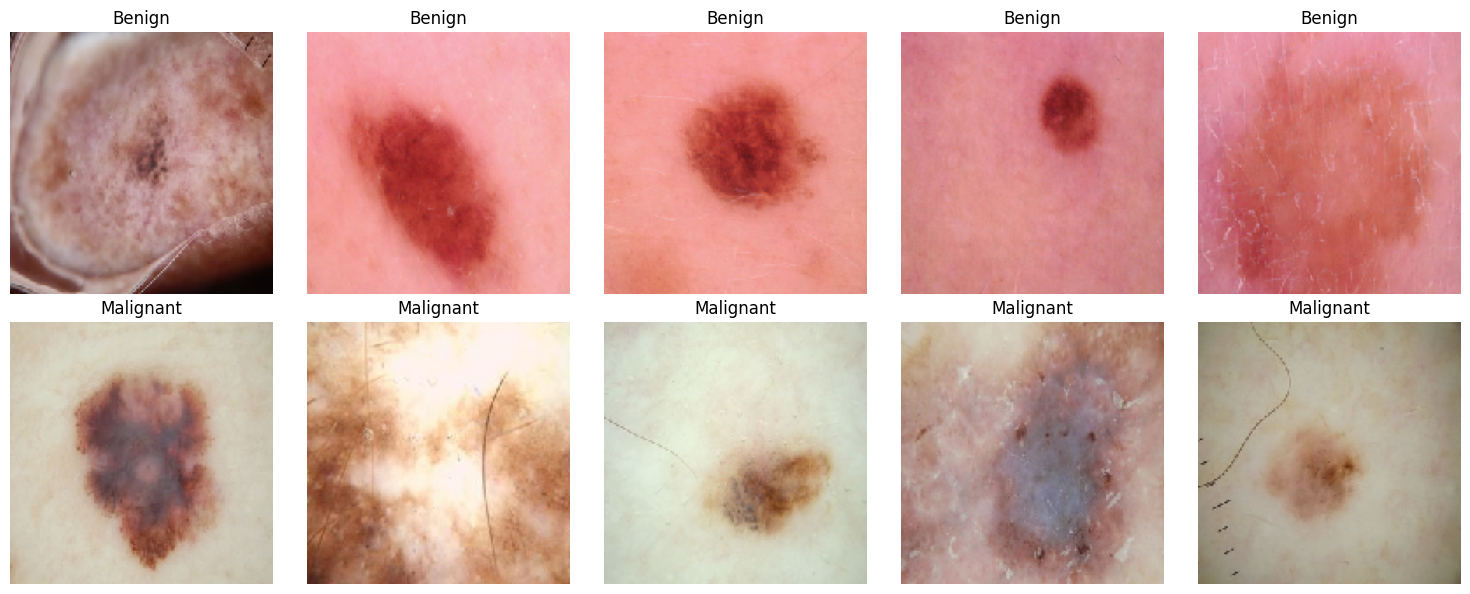

In [5]:
def display_sample_images(images, labels, num_benign=5, num_malignant=5, class_names={0: 'Benign', 1: 'Malignant'}):
    benign_indices = [i for i, label in enumerate(labels) if label == 0]
    malignant_indices = [i for i, label in enumerate(labels) if label == 1]

    selected_benign = np.random.choice(benign_indices, num_benign, replace=False)
    selected_malignant = np.random.choice(malignant_indices, num_malignant, replace=False)

    selected_indices = np.concatenate([selected_benign, selected_malignant])

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(selected_indices):
        plt.subplot(2, len(selected_indices)//2, i + 1)
        plt.imshow(images[idx])
        label = class_names[labels[idx]]
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_images, train_labels, num_benign=5, num_malignant=5)


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7270 - loss: 0.5803 - val_accuracy: 0.8696 - val_loss: 0.3988
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8873 - loss: 0.3506 - val_accuracy: 0.8696 - val_loss: 0.4558
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8868 - loss: 0.3589 - val_accuracy: 0.8696 - val_loss: 0.3919
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9031 - loss: 0.3027 - val_accuracy: 0.8696 - val_loss: 0.3822
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8915 - loss: 0.3131 - val_accuracy: 0.8696 - val_loss: 0.3945
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8876 - loss: 0.3133 - val_accuracy: 0.8696 - val_loss: 0.3770
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8956 - loss: 0.2949 - val_accuracy: 0.8696 - val_loss: 0.3529
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8894 - loss: 0.2996 - val_accuracy: 0.8696 - val_loss: 0.3367
Epoch 9/

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=32)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.9070 - loss: 0.1567
Test Accuracy: 90.74%


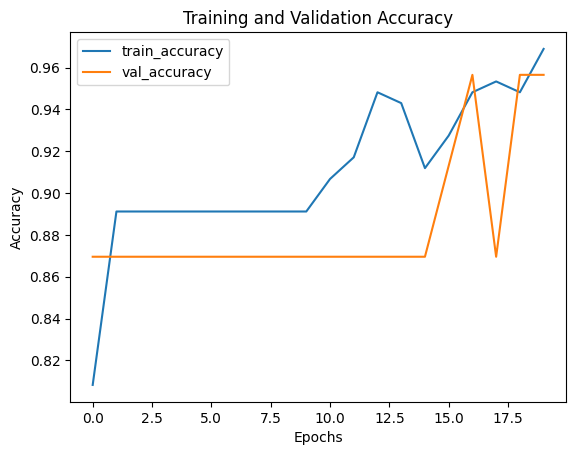

In [9]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


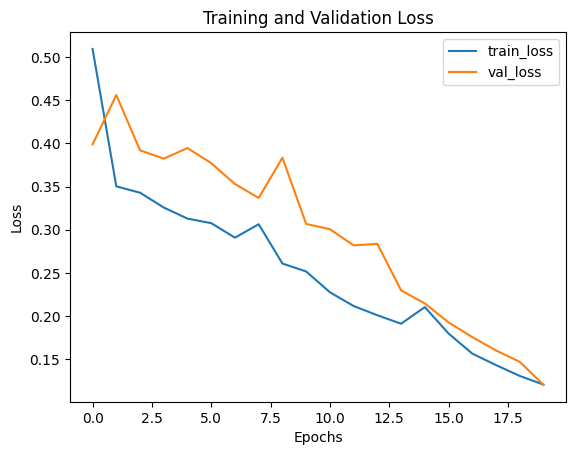

In [10]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step


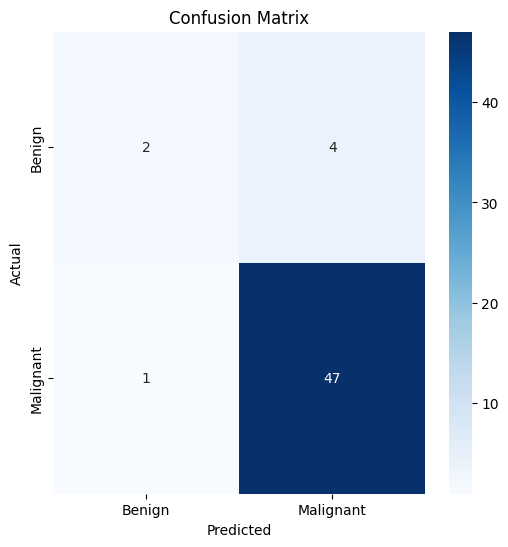

In [11]:
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(int)

cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
model.save('cancer_classifier.h5')


In [17]:
from tensorflow.keras.models import load_model
model = load_model('cancer_classifier.h5')

import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 'path_to_image.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
if prediction < 0.5:
    print("The model predicts: Benign")
else:
    print("The model predicts: Malignant")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_image.jpg'